# Project: TMDB Movie Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.
Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.
There are some odd characters in the ‘cast’ column. 
The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.

> We will try to address which genres are most popular from year to year and What kinds of properties are associated with movies that have high profitability?


In [27]:
# Import packages
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [28]:
# Reading the dataset into dataframe df
df = pd.read_csv('/Users/animesh01/Desktop/Udacity-Python/Datasets/imdbmovies.csv')

In [29]:
# Check Top 5 rows of dataframe 
df.head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [30]:
# Total rows & columns in the dataframe
df.shape

(10866, 21)

In [31]:
# Summary statistics by column
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [32]:
# Column information by datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

### Data Cleaning

In [33]:
# Dropping unrequired columns from the dataframe 
df.drop(['id','imdb_id','tagline','keywords','overview','homepage'], axis=1, inplace=True)

In [34]:
# Column information by datatype
df.shape

(10866, 15)

In [35]:
# Dropping rows with NA values in the dataframe
df = df.dropna(how='any',axis=0) 

In [24]:
# Column information by datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9773 entries, 0 to 10865
Data columns (total 15 columns):
popularity              9773 non-null float64
budget                  9773 non-null int64
revenue                 9773 non-null int64
original_title          9773 non-null object
cast                    9773 non-null object
director                9773 non-null object
runtime                 9773 non-null int64
genres                  9773 non-null object
production_companies    9773 non-null object
release_date            9773 non-null object
vote_count              9773 non-null int64
vote_average            9773 non-null float64
release_year            9773 non-null int64
budget_adj              9773 non-null float64
revenue_adj             9773 non-null float64
dtypes: float64(4), int64(5), object(6)
memory usage: 1.2+ MB


In [36]:
# Summary statistics on the updated dataframe
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,9773.000000,9.773000e+03,9.773000e+03,9773.000000,9773.000000,9773.000000,9773.000000,9.773000e+03,9.773000e+03
mean,0.694711,1.618108e+07,4.422678e+07,102.925509,239.298782,5.963430,2000.879362,1.941707e+07,5.704735e+07
std,1.036879,3.220939e+07,1.225834e+08,27.876224,602.982068,0.913179,13.036453,3.566467e+07,1.514432e+08
min,0.000188,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.232756,0.000000e+00,0.000000e+00,90.000000,18.000000,5.400000,1994.000000,0.000000e+00,0.000000e+00
50%,0.419765,2.000000e+05,0.000000e+00,100.000000,46.000000,6.000000,2005.000000,3.114254e+05,0.000000e+00
75%,0.776380,1.940000e+07,3.104204e+07,112.000000,173.000000,6.600000,2011.000000,2.469335e+07,4.311344e+07
max,32.985763,4.250000e+08,2.781506e+09,877.000000,9767.000000,8.700000,2015.000000,4.250000e+08,2.827124e+09


<a id='eda'></a>
## Exploratory Data Analysis

### Univariate Analysis

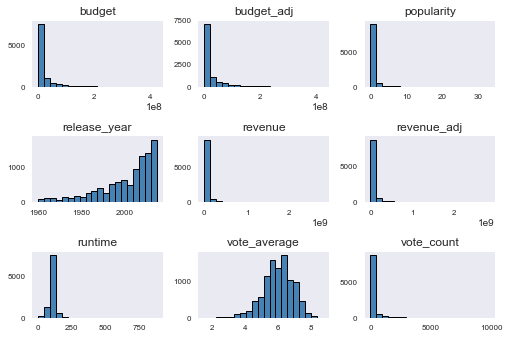

In [188]:
# Histogram visualization to check the distribution for the numerical values in the dataframe
df.hist(bins=20, color='steelblue', edgecolor='black', linewidth=1.0,
           xlabelsize=8, ylabelsize=8, grid=False)    
plt.tight_layout(rect=(0, 0, 1.2, 1.2))   

> **Observation**: We can observe that most of the univariate distributions are assymetric. The attributes in our analysis are highly left or right skewed distribution. Right skewed distribution (Positive skewness) include following variables: budget, budget_adj, popularity, revenue, revenue_adj, runtime & vote_count. Left skewed distribution (Negative Skewness) includes release_year variable. vote_average seems normally distributed.

### Multivariate Analysis

In [127]:
# Correlation matrix
corrmat = df.corr()
corrmat

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
popularity,1.000000,0.538911,0.662404,0.156293,0.802956,0.239118,0.110935,0.505372,0.606457
budget,0.538911,1.000000,0.731176,0.214271,0.627051,0.095998,0.138265,0.968314,0.616300
revenue,0.662404,0.731176,1.000000,0.183305,0.788534,0.192052,0.071711,0.702347,0.918033
runtime,0.156293,0.214271,0.183305,1.000000,0.184291,0.194003,-0.133816,0.249119,0.198319
vote_count,0.802956,0.627051,0.788534,0.184291,1.000000,0.279858,0.124707,0.580433,0.704045
vote_average,0.239118,0.095998,0.192052,0.194003,0.279858,1.000000,-0.140110,0.109750,0.214695
release_year,0.110935,0.138265,0.071711,-0.133816,0.124707,-0.140110,1.000000,0.036122,-0.056329
budget_adj,0.505372,0.968314,0.702347,0.249119,0.580433,0.109750,0.036122,1.000000,0.640833
revenue_adj,0.606457,0.616300,0.918033,0.198319,0.704045,0.214695,-0.056329,0.640833,1.000000


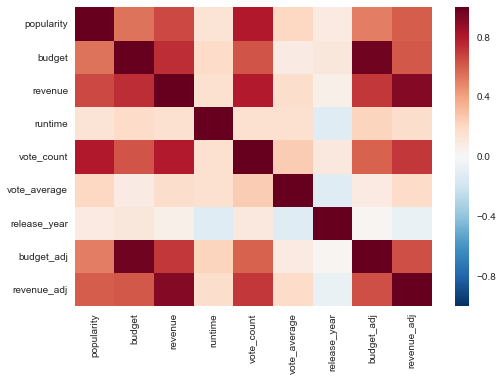

In [168]:
# Visualizing Correlation Matrix to observe the correlation between the variables
corr = df_corr.corr()
sns.heatmap(corr)

> **Observation** : After visualizing the corrmat dataframe we can observe that popularity is highly correlated with vote_count, revenue & revenue_adj. Therefore considering popularity and revenue as the initial metrics for the exploratory analysis could be a good starting point. For our analysis we will be using revenue_adj to consider the inflation rate as of 2010.

### Research Question 1 : What is the relationship between revenue, budget and gross margin ?

In [38]:
# Grouping data by release year on revenue_adj, budget_adj and popularity
df1=df.groupby('release_year',as_index=False).agg({"revenue_adj": "sum","budget_adj": "sum","popularity":"max"})

In [212]:
# Calculate gross margin 
df1['gross_margin'] = df1['revenue_adj']-df1['budget_adj']

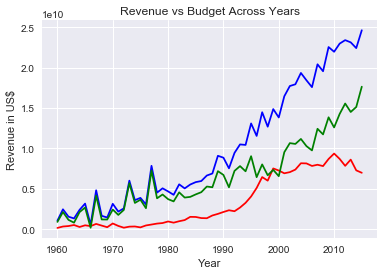

In [41]:
# Linechart visualization to compare revenue, budget and gross margin by year
plt.plot(df1.release_year,df1.revenue_adj,color="blue")
plt.plot(df1.release_year,df1.budget_adj,color="red")
plt.plot(df1.release_year,df1.gross_margin,color="green")
plt.xlabel('Year')
plt.ylabel('Revenue in US$')
plt.title('Revenue vs Budget Across Years')

> **Observation**: From the above visualization we infer that across the years (1960's to 2010 and later) popularity for movies have drastically improved. 
> We also observe that the budget for movies have increased after 1990 but has shown a decline after 2010 but still the gross margin has constantly scaled up with popularity. However, in 2000 we also observe that the gross margin was even lower compared to the budget an interesting dip considering across the years gross margin was always higher than the budget.

### Research Question 2 : Which year had the most popular movies ?

In [119]:
# Top 5 years by popularity of movies
print (df1.nlargest(5, 'popularity')) 

    release_year   revenue_adj    budget_adj  popularity  gross_margin
55          2015  2.461912e+10  6.984589e+09   32.985763  1.763453e+10
54          2014  2.240982e+10  7.284311e+09   24.949134  1.512551e+10
17          1977  7.845261e+09  5.813295e+08   12.037933  7.263931e+09
49          2009  2.253887e+10  8.691031e+09    9.432768  1.384784e+10
50          2010  2.195663e+10  9.361846e+09    9.363643  1.259478e+10


In [120]:
# Top 5 years by profitability of movies
print (df1.nlargest(5, 'gross_margin')) 

    release_year   revenue_adj    budget_adj  popularity  gross_margin
55          2015  2.461912e+10  6.984589e+09   32.985763  1.763453e+10
52          2012  2.339574e+10  7.842783e+09    7.637767  1.555295e+10
54          2014  2.240982e+10  7.284311e+09   24.949134  1.512551e+10
53          2013  2.312077e+10  8.614895e+09    6.112766  1.450587e+10
51          2011  2.296380e+10  8.701888e+09    7.959228  1.426191e+10


### Research Question 3 : Which year had the most popular genre?

In [123]:
# Grouping release year, original title and genre by revenue_adj, budget_adj
df2=df.groupby(['release_year','original_title','genres','director','production_companies','cast'],as_index=False).agg({"revenue_adj": "sum","budget_adj": "sum","popularity":"max"})

In [124]:
# Top 10 movies by popularity
df3=df2.nlargest(10,'popularity')
print(df3)

      release_year                         original_title  \
9447          2015                         Jurassic World   
9485          2015                     Mad Max: Fury Road   
8817          2014                           Interstellar   
8780          2014                Guardians of the Galaxy   
9429          2015                              Insurgent   
8689          2014    Captain America: The Winter Soldier   
702           1977                              Star Wars   
8838          2014                              John Wick   
9599          2015           Star Wars: The Force Awakens   
9091          2014  The Hunger Games: Mockingjay - Part 1   

                                         genres                     director  \
9447  Action|Adventure|Science Fiction|Thriller              Colin Trevorrow   
9485  Action|Adventure|Science Fiction|Thriller                George Miller   
8817            Adventure|Drama|Science Fiction            Christopher Nolan   
8780    

In [125]:
# Top 10 movies by gross_margin
df2['gross_margin']=df2['revenue_adj']-df2['budget_adj']
df_gm=df2.nlargest(10,'gross_margin')
print(df_gm)

      release_year                  original_title  \
702           1977                       Star Wars   
6206          2009                          Avatar   
3087          1997                         Titanic   
513           1973                    The Exorcist   
592           1975                            Jaws   
1005          1982      E.T. the Extra-Terrestrial   
9599          2015    Star Wars: The Force Awakens   
2703          1995                         The Net   
43            1961  One Hundred and One Dalmatians   
892           1980         The Empire Strikes Back   

                                        genres  \
702           Adventure|Action|Science Fiction   
6206  Action|Adventure|Fantasy|Science Fiction   
3087                    Drama|Romance|Thriller   
513                      Drama|Horror|Thriller   
592                  Horror|Thriller|Adventure   
1005  Science Fiction|Adventure|Family|Fantasy   
9599  Action|Adventure|Science Fiction|Fantasy   
2703 

> We can infer that popularity metric has scaled over time but highest grossing movies (Evaluated based on gross margin) have featured earlier than the year 2000. 

In [44]:
# Grouping release year and genre by popularity
df4=df.groupby(['release_year','genres']).agg({"popularity":"mean"})

In [66]:
# Top genres by release year based on popularity
df4.nlargest(10,'popularity')

,release_year,genres,popularity
5434,2015,Action|Adventure|Science Fiction|Thriller,30.702849
5210,2014,Adventure|Drama|Science Fiction,24.949134
5190,2014,Action|Science Fiction|Adventure,14.311205
5473,2015,Adventure|Science Fiction|Thriller,13.112507
5168,2014,Action|Adventure|Science Fiction,12.971027
563,1977,Adventure|Action|Science Fiction,12.037933
5432,2015,Action|Adventure|Science Fiction|Fantasy,11.173104
5372,2014,Science Fiction|Adventure|Thriller,10.739009
4040,2009,Action|Adventure|Fantasy|Science Fiction,9.432768
4307,2010,Action|Thriller|Science Fiction|Mystery|Adventure,9.363643


In [67]:
# Providing new sequential index to the dataframe
df4=df4.reset_index()

In [68]:
# Sorting dataframe in ascending order by release year and popularity
df4=df4.sort_values(['release_year','popularity'],ascending=False)

In [69]:
# Top genres by popularity and release year
df5=df4.groupby('release_year').head(1) 

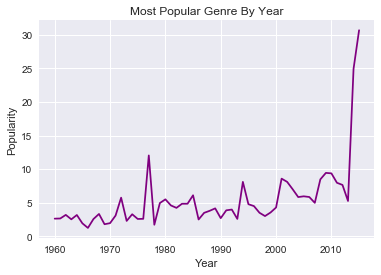

In [109]:
# Trend based on most popular genre movies by release year
plt.plot(df5.release_year,df5.popularity,color="purple")
plt.xlabel('Year')
plt.ylabel('Popularity')
plt.title('Most Popular Genre By Year')

> **Observation**: Based on the above line chart visualization we can observe that there are two clear spikes as far as the popularity metric is concerned. One was between 1970-1980 with a popularity index between 10-15 and then after 2010 werein the index rose above 30. Through the analysis we observe that year 2015 included movies with the highest popularity which belonged to the 'Action|Adventure|Science Fiction|Thriller' genre.

### Research Question 4 : Which year had the least popular genre?

In [113]:
# Bottom genres by release year and popularity
df6=df4.groupby('release_year').tail(1) 

In [114]:
df_least_pop=df6.sort_values(['popularity','release_year'],ascending=True)

In [116]:
# 10 Genres by least popularity by release year
df_least_pop.head(10)

,index,release_year,genres,popularity
5354,359,1971,Mystery|Comedy|Drama,0.000188
2433,3336,2005,Comedy|Mystery,0.000973
965,4815,2012,Crime|Drama|History|Documentary,0.001372
5161,549,1976,Horror|Mystery|Thriller|Crime,0.002381
4863,849,1982,Drama|Romance|Comedy,0.003659
1859,3929,2008,Documentary|Family,0.005391
1648,4115,2009,Animation|Science Fiction,0.005502
4501,1188,1987,Action|Crime,0.005529
1192,4533,2011,Adventure|Comedy|Fantasy,0.007304
5573,134,1964,Horror,0.008990


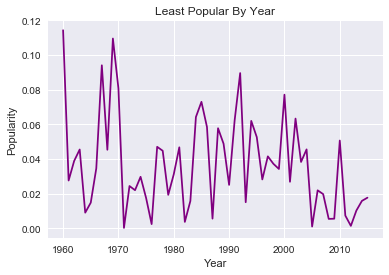

In [74]:
# Trend line to observe least popular movies by year
plt.plot(df6.release_year,df6.popularity,color="purple")
plt.xlabel('Year')
plt.ylabel('Popularity')
plt.title('Least Popular By Year')

> **Observation**: As far as the least popular movies are concerned we observe major downfalls in 1971, 2005 & 2012. From the above line chart visualization we can infer that the least popular genre was 'Mystery|Comedy|Drama' from the year 1971.

### Research Question 5 : Who are the most profitable directors?

In [80]:
# Grouping directors based on revenue_adj, budget_adj , popularity and average vote
df7 = df.groupby('director',as_index=False).agg({"revenue_adj": "sum","budget_adj": "sum","popularity":"mean","vote_average":"mean"})

In [81]:
# Calculating Gross Margin
df7['gross_margin'] = df7['revenue_adj'] - df7['budget_adj']

In [169]:
# Top 10 based on gross margin
df8 = df7.nlargest(10,'gross_margin')

# Printing dataframe
print(df8)

               director   revenue_adj    budget_adj  popularity  vote_average  \
4095   Steven Spielberg  1.520245e+10  2.151770e+09    1.875138      6.824138   
1767      James Cameron  7.327221e+09  1.030992e+09    3.202686      6.844444   
1476       George Lucas  6.313919e+09  4.697600e+08    3.910306      6.700000   
3375      Peter Jackson  7.019848e+09  1.375725e+09    3.774454      7.000000   
672      Chris Columbus  5.094077e+09  7.407345e+08    2.251037      6.400000   
3685    Robert Zemeckis  5.655648e+09  1.328678e+09    1.977627      6.705882   
2917        Michael Bay  5.460672e+09  1.501996e+09    2.023170      6.327273   
1053        David Yates  4.177455e+09  7.830252e+08    5.126634      7.400000   
4195         Tim Burton  4.529285e+09  1.328826e+09    1.923092      6.661111   
742   Christopher Nolan  4.164262e+09  1.014694e+09    6.865185      7.577778   

      gross_margin  
4095  1.305068e+10  
1767  6.296229e+09  
1476  5.844159e+09  
3375  5.644123e+09  
672

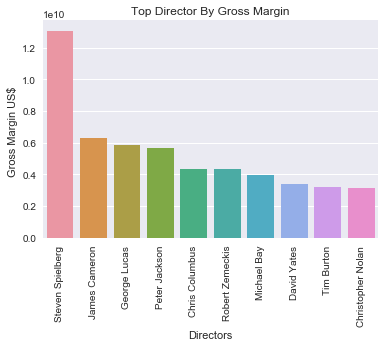

In [84]:
# Visualizing Top Director based on gross margin
sns.barplot(x=df8['director'], y=df8['gross_margin'])
plt.xticks(rotation= 90)
plt.xlabel('Directors')
plt.ylabel('Gross Margin US$ ')
plt.title('Top Director By Gross Margin')

> **Observation**: From the visual we can clearly understand that the most profitable director among the popular director's is Steven Spielberg however the second set of popular and profitable directors are closely aligned for example James Cameron, George Lucas & Peter Jackson.

### Research Question 6 : Which year included the highest count of profitable director's making movies ?  

In [130]:
# Creating dataframe with the Top Director's list
filter_list = ['Steven Spielberg', 'James Cameron', 'George Lucas','Peter Jackson','Chris Columbus',
              'Robert Zemeckis','Michael Bay','David Yates','Tim Burton','Christopher Nolan']
df_dir=df[df.director.isin(filter_list)]

In [131]:
# Calculate gross margin
df_dir['gross_margin'] = df_dir['revenue_adj']-df_dir['budget_adj']

/Users/animesh01/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


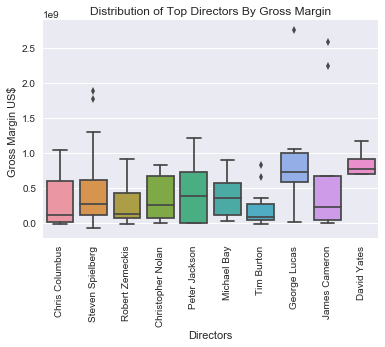

In [132]:
# Box plot visual to check the distribution of Gross margin by director
sns.boxplot(x='director', y="gross_margin", data=df_dir)
plt.xticks(rotation= 90)
plt.xlabel('Directors')
plt.ylabel('Gross Margin US$ ')
plt.title('Distribution of Top Directors By Gross Margin')

> **Observation** : Based on the visualization we conclude that except for Steven Spielberg, Tim Burton, George Lucas & James Cameron rest all the popular and profitable directors are uniformly distributed and don't have any crazy outliers in terms of gross margin. 

In [133]:
# Grouping director by release year
df_dir1 = df_dir.groupby(['release_year','director']).size().sort_values(ascending=False).reset_index(name='count').drop_duplicates(subset='director')

In [134]:
# Printing the dataframe
print(df_dir1)

,release_year,director,count
0,2012,Tim Burton,2
1,2000,Robert Zemeckis,2
2,1993,Steven Spielberg,2
10,1991,Chris Columbus,1
12,1991,James Cameron,1
15,1992,Peter Jackson,1
25,1995,Michael Bay,1
34,1998,Christopher Nolan,1
36,1973,George Lucas,1
70,2009,David Yates,1


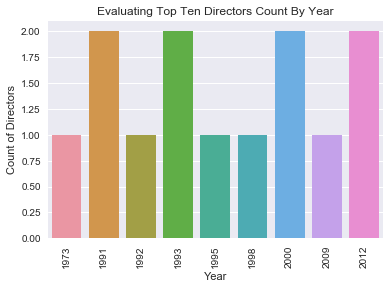

In [135]:
# Visualizaing which year had highest count of top profitable directors making movies
sns.barplot(x='release_year',y='count',data=df_dir1,estimator=sum)
plt.xticks(rotation= 90)
plt.xlabel('Year')
plt.ylabel('Count of Directors')
plt.title('Evaluating Top Ten Directors Count By Year')

> **Observation** : As we observe from the above visualization the year wherein the most number of popular director's made movies are in the year 1991, 1993, 2000 & 2012.

### Research Question 7 : Does high vote count insure high profitability for a movie?

In [163]:
# Dataframe includes movies from the most profitable directors
df_dir['gross_margin'] = df_dir['revenue_adj']-df_dir['budget_adj']
df_dir2 = df_dir.groupby(['release_year','director','original_title','production_companies'], as_index=False).agg({'gross_margin': 'sum','vote_count': 'sum'})

/Users/animesh01/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [164]:
df_dir3 = df_dir2.sort_values(['gross_margin'],ascending=False)

In [171]:
df_dir3 = df_dir3.head(5)

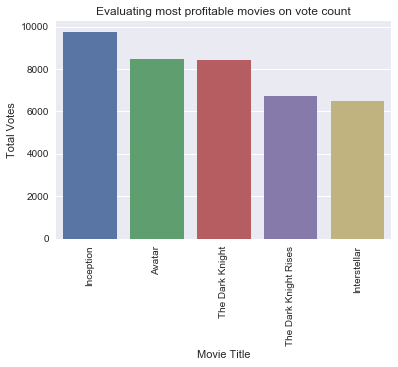

In [179]:
# Visualizaing movies (from profitable directors) with highest gross margin based on vote_count
sns.barplot(x='original_title', y='vote_count', data = df_dir3, estimator=sum)
plt.xticks(rotation= 90)
plt.xlabel('Movie Title')
plt.ylabel('Total Votes')
plt.title('Evaluating most profitable movies on vote count')

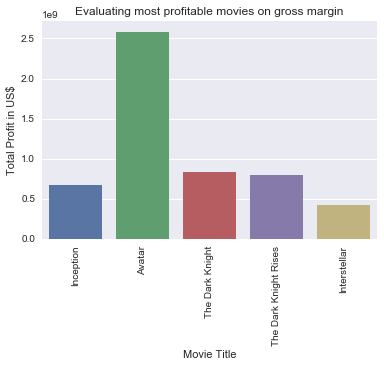

In [180]:
# Visualizaing movies (from profitable directors) with highest gross margin 
sns.barplot(x='original_title', y='gross_margin', data = df_dir3, estimator=sum)
plt.xticks(rotation= 90)
plt.xlabel('Movie Title')
plt.ylabel('Total Profit in US$')
plt.title('Evaluating most profitable movies on gross margin')

> **Observation** : vote_count is not a good measure of how profitable a movie is even though it gets directed by a bankable director. For example Inception had the highest vote count but it is still not the most profitable.
Therefore we can't assume movies getting more votes will be profitable.

### Research Question 8 : Who are the most popular directors?

In [104]:
# Checking top directors based on popularity and gross margin
df9=df7.nlargest(10,['popularity','gross_margin'])

In [105]:
# Printing dataframe
df9

,director,revenue_adj,budget_adj,popularity,vote_average,gross_margin
789,Colin Trevorrow,1.396252e+09,1.387122e+08,16.696886,6.600000,1.257540e+09
2061,Joe Russo|Anthony Russo,6.583651e+08,1.565855e+08,12.971027,7.600000,5.017796e+08
626,Chad Stahelski|David Leitch,7.252661e+07,1.842182e+07,11.422751,7.000000,5.410479e+07
1137,Don Hall|Chris Williams,6.006485e+08,1.519800e+08,8.691294,7.800000,4.486685e+08
2514,Kyle Balda|Pierre Coffin,1.064192e+09,6.807997e+07,7.404165,6.500000,9.961120e+08
3096,MÃ¥ns MÃ¥rlind|BjÃ¶rn Stein,1.257461e+08,6.648210e+07,7.031452,6.000000,5.926404e+07
87,Alan Taylor,8.544311e+08,3.017256e+08,6.883129,6.300000,5.527055e+08
742,Christopher Nolan,4.164262e+09,1.014694e+09,6.865185,7.577778,3.149568e+09
3335,Pete Docter,7.854116e+08,1.609999e+08,6.326804,8.000000,6.244116e+08
120,Alex Garland,3.391985e+07,1.379999e+07,6.118847,7.600000,2.011985e+07


In [106]:
# Sorting dataframe by gross margin and popularity
df9=df9.sort_values(['gross_margin','popularity'],ascending=False)

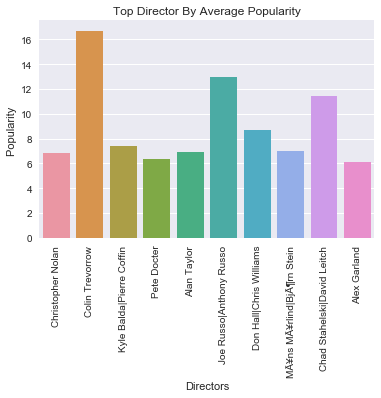

In [107]:
# Barchart visualization to check top director by popularity
sns.barplot(x=df9['director'], y=df9['popularity'])
plt.xticks(rotation= 90)
plt.xlabel('Directors')
plt.ylabel('Popularity ')
plt.title('Top Director By Average Popularity')

> **Observation** : In the above analysis we are categorizing director's solely on the aspect of popularity index.
From the visual we can conclude that Colin Trevorrow is the most popular director having a popularity index of 16.69. 

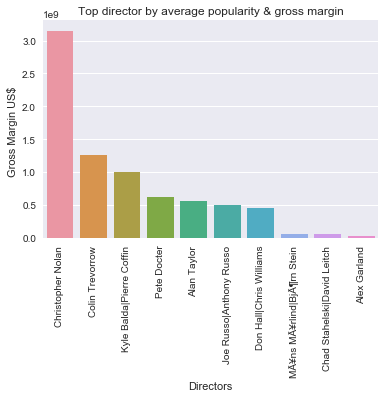

In [183]:
# Barchart visualization to check top director by gross margin
sns.barplot(x=df9['director'], y=df9['gross_margin'],estimator=sum)
plt.xticks(rotation= 90)
plt.xlabel('Directors')
plt.ylabel('Gross Margin US$ ')
plt.title('Top director by average popularity & gross margin')

> **Observation**: We can conclude from the above visualization that among the popular director's Christopher Nolan is the most profitable director and after him we have the most popular director as the second most profitable director Colin Trevorrow. 

### Research Question 9 : Does the success of a movie depend on production company ?

In [205]:
# Including the profitable directors
df_comp = df_dir.groupby(['director','production_companies']).agg({'gross_margin':sum, 
                                                                   'production_companies':"count"})
# Top 15 based on gross margin
df_comp.nlargest(15,'gross_margin') 

gross_margin  \
director         production_companies                                               
Steven Spielberg Universal Pictures|Amblin Entertainment             3.725489e+09   
                 Lucasfilm|Paramount Pictures                        2.891116e+09   
George Lucas     Lucasfilm|Twentieth Century Fox Film Corporation    2.750137e+09   
James Cameron    Ingenious Film Partners|Twentieth Century Fox F...  2.586237e+09   
George Lucas     Lucasfilm                                           2.524116e+09   
James Cameron    Paramount Pictures|Twentieth Century Fox Film C...  2.234714e+09   
Peter Jackson    WingNut Films|New Line Cinema|The Saul Zaentz C...  1.985685e+09   
Steven Spielberg Universal Pictures|Zanuck/Brown Productions         1.921981e+09   
Robert Zemeckis  Universal Pictures|Amblin Entertainment|U-Drive...  1.589016e+09   
David Yates      Warner Bros.|Heyday Films                           1.399482e+09   
Peter Jackson    WingNut Films|New Line Cinema|Metro-Goldwyn-May...  1.391543e+09   
Chris Columbus   Twentieth Century Fox Film Corporation|Hughes E...  1.330361e+09   
Michael Bay      Paramount Pictures|DreamWorks SKG|Amblin Entert...  1.286182e+09   
Peter Jackson    WingNut Films|New Line Cinema                       1.214855e+09   
David Yates      Warner Bros.|Heyday Films|Moving Picture Compan...  1.166009e+09   

                                                                     production_companies  
director         production_companies                                                      
Steven Spielberg Universal Pictures|Amblin Entertainment                                4  
                 Lucasfilm|Paramount Pictures                                           4  
George Lucas     Lucasfilm|Twentieth Century Fox Film Corporation                       1  
James Cameron    Ingenious Film Partners|Twentieth Century Fox F...                     1  
George Lucas     Lucasfilm                                                              3  
James Cameron    Paramount Pictures|Twentieth Century Fox Film C...                     1  
Peter Jackson    WingNut Films|New Line Cinema|The Saul Zaentz C...                     2  
Steven Spielberg Universal Pictures|Zanuck/Brown Productions                            2  
Robert Zemeckis  Universal Pictures|Amblin Entertainment|U-Drive...                     3  
David Yates      Warner Bros.|Heyday Films                                              2  
Peter Jackson    WingNut Films|New Line Cinema|Metro-Goldwyn-May...                     2  
Chris Columbus   Twentieth Century Fox Film Corporation|Hughes E...                     3  
Michael Bay      Paramount Pictures|DreamWorks SKG|Amblin Entert...                     2  
Peter Jackson    WingNut Films|New Line Cinema                                          1  
David Yates      Warner Bros.|Heyday Films|Moving Picture Compan...                     1

In [210]:
# Creating dataframe with the Popular Director's list
filter_list_pop = ['Colin Trevorrow', 'Joe Russo|Anthony Russo', 'Chad Stahelski|David Leitch','Don Hall|Chris Williams','Kyle Balda|Pierre Coffin',
              'MÃ¥ns MÃ¥rlind|BjÃ¶rn Stein','Alan Taylor','Christopher Nolan','Pete Docter','Alex Garland']

# Creating dataframe from the popular director list
df_dir_pop=df[df.director.isin(filter_list_pop)]

# Calculate gross margin 
df_dir_pop['gross_margin'] = df_dir_pop['revenue_adj'] - df_dir_pop['budget_adj']

# Aggregate data based on gross margin and production company
df_comp_pop = df_dir_pop.groupby(['director','production_companies']).agg({'gross_margin':sum, 
                                                                   'production_companies':"count"})
# Top 15 based on gross margin
df_comp_pop.nlargest(15,'gross_margin') 



/Users/animesh01/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


gross_margin  \
director                    production_companies                                               
Colin Trevorrow             Universal Studios|Amblin Entertainment|Legendar...  1.254446e+09   
Kyle Balda|Pierre Coffin    Universal Pictures|Illumination Entertainment       9.961120e+08   
Christopher Nolan           DC Comics|Legendary Pictures|Warner Bros.|Syncopy   8.273675e+08   
                            Legendary Pictures|Warner Bros.|DC Entertainmen...  7.892767e+08   
                            Legendary Pictures|Warner Bros.|Syncopy             6.655000e+08   
Pete Docter                 Walt Disney Pictures|Pixar Animation Studios|Wa...  6.244116e+08   
Joe Russo|Anthony Russo     Marvel Studios                                      5.017796e+08   
Don Hall|Chris Williams     Walt Disney Pictures|Walt Disney Animation Studios  4.486685e+08   
Christopher Nolan           Paramount Pictures|Legendary Pictures|Warner Br...  4.207106e+08   
Alan Taylor                 Marvel Studios                                      2.899504e+08   
                            Paramount Pictures|Skydance Productions             2.627551e+08   
Christopher Nolan           DC Comics|Legendary Pictures|Warner Bros.|DC En...  2.503543e+08   
                            Section Eight|Alcon Entertainment|Witt/Thomas P...  8.208807e+07   
                            Touchstone Pictures|Syncopy                         7.536672e+07   
MÃ¥ns MÃ¥rlind|BjÃ¶rn Stein Lakeshore Entertainment|Saturn Films|Screen Gem...  5.926404e+07   

                                                                                production_companies  
director                    production_companies                                                      
Colin Trevorrow             Universal Studios|Amblin Entertainment|Legendar...                     1  
Kyle Balda|Pierre Coffin    Universal Pictures|Illumination Entertainment                          1  
Christopher Nolan           DC Comics|Legendary Pictures|Warner Bros.|Syncopy                      1  
                            Legendary Pictures|Warner Bros.|DC Entertainmen...                     1  
                            Legendary Pictures|Warner Bros.|Syncopy                                1  
Pete Docter                 Walt Disney Pictures|Pixar Animation Studios|Wa...                     1  
Joe Russo|Anthony Russo     Marvel Studios                                                         1  
Don Hall|Chris Williams     Walt Disney Pictures|Walt Disney Animation Studios                     1  
Christopher Nolan           Paramount Pictures|Legendary Pictures|Warner Br...                     1  
Alan Taylor                 Marvel Studios                                                         1  
                            Paramount Pictures|Skydance Productions                                1  
Christopher Nolan           DC Comics|Legendary Pictures|Warner Bros.|DC En...                     1  
                            Section Eight|Alcon Entertainment|Witt/Thomas P...                     1  
                            Touchstone Pictures|Syncopy                                            1  
MÃ¥ns MÃ¥rlind|BjÃ¶rn Stein Lakeshore Entertainment|Saturn Films|Screen Gem...                     1

> Therefore we can observe that profitable directors are backed by bigger and successful production companies more often in comparison to the popular directors.
We can attribute that being one of the reasons for the success of a movie.

<a id='conclusions'></a>
## Conclusions

> From the above exploratory data analysis we have the following conclusions:

> 1.We initially categorized popularity and revenue_adj as the two attributes on which we would conduct our analysis.

> 2.Rather than solely evaluating a movie on revenue we understood that gross margin is a better measure to observe if a movie is successful/profitable.

> 3.'Action|Adventure|Science Fiction|Thriller' is the most popular genre.

> 4.Movies which are financially more successful may not be directed by the most popular directors as we know that only christopher nolan from the profitable directors list was part of the popular directors list.

> 5.Profitable and more successful movies are usually backed by bigger production companies.

> 6.Popularity and higher profit is driven by more bankable director's (Individuals who have had more occurrences of financial sucess compared to those who have had a good popularity index).
